In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime


In [2]:
import os
import Bars
import new_transaction

In [3]:
import awesome_indicator
import macd_indicator
import cci_indicator
import stoch_indicator

In [3]:
from QuikPy import QuikPy

In [4]:
qpProvider = QuikPy()

In [5]:
qpProvider

In [1]:
import indicators_py.awesome_indicator as awesome_indicator

In [7]:
Bars.start_func(qpProvider, '1H')

Таймфрейм: 1H
Список котировок ('SBER', 'GAZP', 'ROSN')
SBER
Index(['low', 'close', 'interval', 'sec', 'volume', 'class', 'high', 'open',
       'datetime.count', 'month', 'second', 'year', 'minute', 'day', 'hour',
       'datetime.ms', 'datetime.week_day'],
      dtype='object')
GAZP
Index(['low', 'close', 'interval', 'sec', 'volume', 'class', 'high', 'open',
       'datetime.count', 'month', 'second', 'year', 'minute', 'day', 'hour',
       'datetime.ms', 'datetime.week_day'],
      dtype='object')
ROSN
Index(['low', 'close', 'interval', 'sec', 'volume', 'class', 'high', 'open',
       'datetime.count', 'month', 'second', 'year', 'minute', 'day', 'hour',
       'datetime.ms', 'datetime.week_day'],
      dtype='object')
Таймфрейм: 1H
Список котировок ('VTBX',)
VTBX
Index(['low', 'close', 'interval', 'sec', 'volume', 'class', 'high', 'open',
       'datetime.count', 'month', 'second', 'year', 'minute', 'day', 'hour',
       'datetime.ms', 'datetime.week_day'],
      dtype='object')
Тай

In [10]:
new_transaction.start_func(qpProvider, 'TQBR', 'GAZP', 'NEW_STOP_ORDER', 'SELL', 240, 1)

Стоп-лосс по цене 228.0
Заявка на стоп-лосс отправлена
Номер транзакции: 47646
{'TRANS_ID': '47646', 'CLIENT_CODE': '10NY8F', 'ACCOUNT': 'L01-00000F00', 'ACTION': 'NEW_STOP_ORDER', 'CLASSCODE': 'TQBR', 'SECCODE': 'GAZP', 'OPERATION': 'S', 'PRICE': '228.0', 'QUANTITY': '1', 'STOPPRICE': '228.0', 'EXPIRY_DATE': 'GTC'}
------------
OnTransReply
{'order_num': 139717090, 'result_msg': 'Стоп-заявка N [139717090] зарегистрирована.', 'flags': 2490369, 'time': 181458, 'error_source': 0, 'class_code': 'TQBR', 'status': 3, 'date_time': {'hour': 18, 'day': 8, 'year': 2022, 'sec': 58, 'week_day': 5, 'month': 4, 'ms': 852, 'min': 14, 'mcs': 852149}, 'balance': 0.0, 'trans_id': 47646, 'first_ordernum': 0, 'uid': 180462, 'firm_id': 'MC0003300000', 'error_code': 0, 'gate_reply_time': {'hour': 0, 'day': 1, 'year': 1601, 'sec': 0, 'week_day': 1, 'month': 1, 'ms': 0, 'min': 0, 'mcs': 0}, 'sec_code': 'GAZP', 'exchange_code': '', 'quantity': 1.0, 'client_code': '10NY8F', 'brokerref': '10NY8F', 'account': 'L

In [21]:
del qpProvider

NameError: name 'qpProvider' is not defined

In [4]:
#os.listdir('./Data')

## Запуск алгоритма

In [4]:
def func_1(x):
    
    return datetime.strptime(x, '%d.%m.%Y %H:%M')

In [5]:
def CCI(df): 
    
    df['TP'] = (df['high'] + df['low'] + df['close']) / 3 
    df['sma'] = df['TP'].rolling(20).mean()
    df['mad'] = df['TP'].rolling(20).apply(lambda x: pd.Series(x).mad())
    df['cci'] = (df['TP'] - df['sma']) / (0.015 * df['mad']) 
    
    return df['cci']

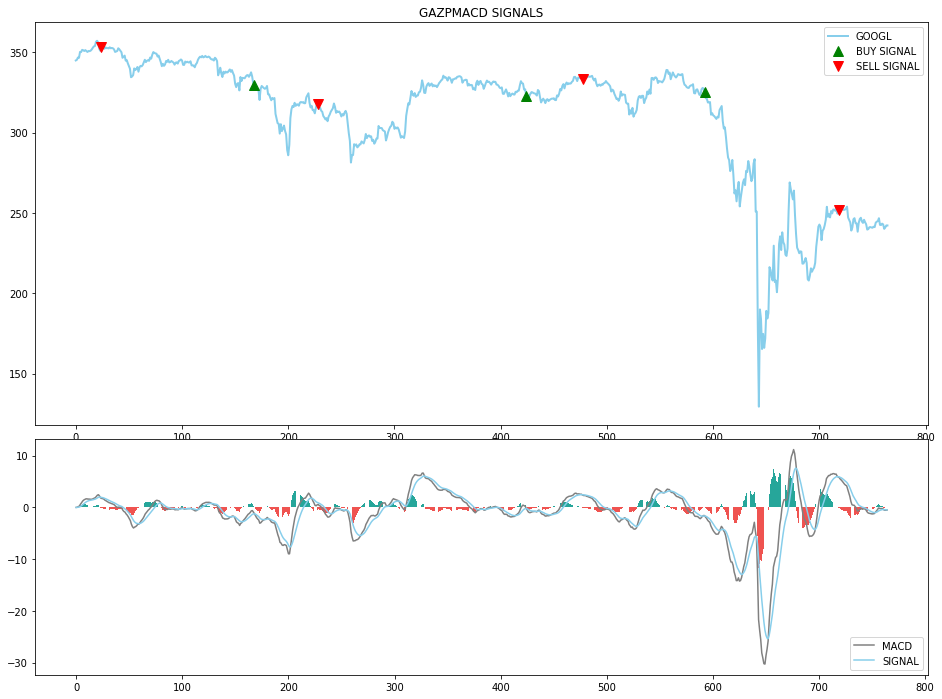

In [6]:
#Bars.start_func('1H') #Собираем крайние данные котировок часовые

for prod_name in ['GAZP',]:

    df = pd.read_csv('Data/' + 'TQBR.' + prod_name + '_1H.txt', sep='\t')
    df.datetime = df.datetime.apply(lambda x: func_1(x))
    df.datetime = df.datetime.astype('datetime64')
    df = df.loc[lambda x: x.datetime >= pd.to_datetime('2022-01-01')].set_index('datetime')
    df['cci'] = CCI(df)
    macd_strategy = macd_indicator.get_signals(prod_name, df.reset_index())
    df = df.merge(macd_strategy.drop(['close', 'macd', 'signal'], axis=1), on='datetime', how='inner')

In [7]:
df

,open,high,low,close,volume,TP,sma,mad,cci,macd_signal,macd_position
datetime,,,,,,,,,,,
2022-01-03 06:00:00,345.00,345.00,345.00,345.00,6038,345.000000,NaN,NaN,NaN,0,1
2022-01-03 07:00:00,345.01,346.50,344.30,345.38,228865,345.393333,NaN,NaN,NaN,0,1
2022-01-03 08:00:00,345.38,347.81,345.03,346.82,168930,346.553333,NaN,NaN,NaN,0,1
2022-01-03 09:00:00,346.80,347.38,346.30,346.62,136691,346.766667,NaN,NaN,NaN,0,1
2022-01-03 10:00:00,346.62,351.88,346.40,350.33,845987,349.536667,NaN,NaN,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-08 13:00:00,243.42,244.00,242.61,242.92,81572,243.176667,242.901333,1.431867,12.819319,0,0
2022-04-08 14:00:00,242.92,243.80,240.01,240.17,175834,241.326667,242.786500,1.474500,-66.003542,0,0
2022-04-08 15:00:00,240.22,241.54,240.00,241.11,145312,240.883333,242.583833,1.457167,-77.799382,0,0


In [13]:
147/0.98



150.0

In [8]:
# Если последний сигнал был на покупку - покупаем и выставляем стоп-лосс
## !! Менять хост перед запуком
if df.iloc[-1]['macd_signal'] == 0:
    
    last_close_price = df.iloc[-1]['close']
    #last_close_price = 148
    
    #new_transaction.start_func('192.168.43.194', 'TQTF', prod_name, 'NEW_ORDER', 'BUY', 0, 1)
    new_transaction.start_func('auto', 'TQBR', prod_name, 'NEW_STOP_ORDER', 'SELL', last_close_price, 1)

Стоп-лосс по цене 230.17
Заявка на стоп-лосс отправлена
Номер транзакции: 92428
{'TRANS_ID': '92428', 'CLIENT_CODE': '10NY8F', 'ACCOUNT': 'L01-00000F00', 'ACTION': 'NEW_STOP_ORDER', 'CLASSCODE': 'TQBR', 'SECCODE': 'GAZP', 'OPERATION': 'S', 'PRICE': '230.17', 'QUANTITY': '1', 'STOPPRICE': '230.17', 'EXPIRY_DATE': 'GTC'}
------------


In [ ]:
Стоп-заявка N [139710471] не прошла контроль лимитов

In [4]:
# Снятие стоп-заявки
new_transaction.start_func('TQBR', 'SBER', 'KILL_STOP_ORDER', 'KILL', '-', '-', 139705178)


{"cmd":"sendTransaction","id":0,"data":true,"t":""}

Удаление стоп заявки отправлено на рынок: True
Номер транзакции: 19944
{'TRANS_ID': '19944', 'ACTION': 'KILL_STOP_ORDER', 'CLASSCODE': 'TQBR', 'SECCODE': 'SBER', 'STOP_ORDER_KEY': '139705178'}
------------


In [ ]:
Стоп-лосс по цене 149.58
{"cmd":"sendTransaction","id":49042,"data":true,"t":""}

Заявка на стоп-лосс отправлена
Номер транзакции: 49042
{'TRANS_ID': '49042', 'CLIENT_CODE': '10NY8F', 'ACCOUNT': 'L01-00000F00', 'ACTION': 'NEW_STOP_ORDER', 'CLASSCODE': 'TQBR', 'SECCODE': 'SBER', 'OPERATION': 'S', 'PRICE': '152.63', 'QUANTITY': '1', 'STOPPRICE': '149.58', 'EXPIRY_DATE': 'GTC'}
------------

In [ ]:
Стоп-лосс по цене 149.58

In [1]:
df.iloc[-1]['close']

NameError: name 'df' is not defined

In [10]:
data_1

{'cmd': 'sendTransaction', 'id': 99271, 'data': True, 't': ''}

In [ ]:
{'TRANS_ID': '99271', 'CLIENT_CODE': '10NY8F', 'ACCOUNT': 'L01-00000F00', 'ACTION': 'NEW_ORDER', 'CLASSCODE': 'TQBR', 'SECCODE': 'SBER', 'OPERATION': 'B', 'PRICE': '0', 'QUANTITY': '1', 'TYPE': 'M'}
Заявка на покупку отправлена
Номер транзакции: 99271
!!!!!
{'cmd': 'sendTransaction', 'id': 99271, 'data': True, 't': ''}
Стоп-лосс по цене 146.559


In [16]:

#df = df.merge(ao_strategy.drop('close', axis=1), on='datetime', how='inner')
#df = df.merge(cci_strategy.drop('close', axis=1), on='datetime', how='inner')
#df = df.merge(stoch_strategy.drop('close', axis=1), on='datetime', how='inner')

In [103]:
#df = df.drop(['ao_signal', 'macd_signal'], axis=1)
#'macd_signal', 'cci_signal'

In [17]:
df

,open,high,low,close,volume,macd_signal,macd_position
datetime,,,,,,,
2021-06-04 17:00:00,310.35,310.53,309.31,309.83,236618,-1,0
2021-06-04 18:00:00,309.80,310.84,309.70,310.46,260035,0,0
2021-06-04 19:00:00,310.25,310.85,310.25,310.83,29947,0,0
2021-06-04 20:00:00,310.82,311.55,310.68,311.09,96894,0,0
2021-06-04 21:00:00,311.09,311.49,311.00,311.22,38628,0,0
...,...,...,...,...,...,...,...
2022-04-01 14:00:00,152.10,153.50,151.50,153.45,684603,0,0
2022-04-01 15:00:00,153.45,153.46,151.50,152.23,547065,0,0
2022-04-01 16:00:00,152.20,153.30,151.69,153.04,708124,0,0


0.0

In [15]:
if df.iloc[-1]['macd_signal'] == 0:
    print(1)
    #Делаем транзакцию по инструменту
    #Выставляем стоп-лосс

1


In [ ]:
#Собираем инструменты в транзакции
# Прроверяем и двигаем стоп-лосс

In [40]:
df.macd_signal.value_counts()

 0    2764
 1     113
-1     113
Name: macd_signal, dtype: int64

In [39]:
df.loc[lambda x: abs(x.macd_signal)==1]

,open,high,low,close,volume,macd_signal,macd_position
datetime,,,,,,,
2021-06-04 17:00:00,557.75,557.80,555.00,555.60,669720,-1,0
2021-06-07 21:00:00,550.65,552.95,550.50,552.60,98920,1,1
2021-06-08 11:00:00,550.10,550.35,545.50,546.00,1073530,-1,0
2021-06-08 19:00:00,548.35,548.90,547.20,548.20,28000,1,1
2021-06-10 10:00:00,548.20,548.55,541.00,542.85,1160830,-1,0
...,...,...,...,...,...,...,...
2022-02-22 12:00:00,417.30,424.30,410.20,420.15,5996933,1,1
2022-02-22 14:00:00,418.15,418.85,395.80,402.20,8597266,-1,0
2022-02-22 15:00:00,402.20,422.00,398.05,415.35,8692562,1,1


In [106]:
df.ao_position = df.ao_position.map(lambda x: 1 if x==1 else -1)
df.macd_position = df.macd_position.map(lambda x: 1 if x==1 else -1)
#df.cci_position = df.cci_position.map(lambda x: 1 if x==1 else -1)
#df.stoch_position = df.stoch_position.map(lambda x: 1 if x==1 else -1)

In [107]:
df['final_position'] = 0
df['final_signal'] = 0

In [108]:
df['sum_position'] = df['ao_position'] + df['macd_position']
# + df['cci_position']+ df['stoch_position']

In [109]:
df['sum_position'].value_counts()

 0    93
 2    79
-2    68
Name: sum_position, dtype: int64

In [110]:
for i in range(df.shape[0]):
    if df['sum_position'][i]==2:
        df['final_position'][i] = 1
        
    elif df['sum_position'][i]==-2:
        df['final_position'][i] = -1
        
    else:
        df['final_position'][i] = df['final_position'][i-1]
        
        
    #if df['sum_position'][i]==1:
    #    df['final_position'][i] = df['final_position'][i-1]

C:\Users\yaroslav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\yaroslav\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\yaroslav\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [111]:
df['final_position'].value_counts()

 1    145
-1     95
Name: final_position, dtype: int64

In [112]:
df.loc[lambda x: x.final_position==0].tail(3)

,open,high,low,close,volume,macd_position,ao,ao_position,final_position,final_signal,sum_position
datetime,,,,,,,,,,,


In [85]:
#df = df.loc[lambda x: x.final_position!=0]

In [113]:
df['final_signal'] = df['final_position'].diff(1)

In [114]:
df.final_signal = df.final_signal.map(lambda x: x/2)

In [115]:
df['final_signal'].value_counts()

 0.0    232
-1.0      4
 1.0      3
Name: final_signal, dtype: int64

In [116]:
df.loc[lambda x: abs(x.final_signal)==1].shape[0]

7

In [117]:
df['final_buy'] = df['close'] * df['final_signal']
df['final_sell'] = -df['final_buy']

In [118]:
df['final_sell'] = df['final_sell'].map(lambda x: np.nan if x<=0 else x)
df['final_buy'] = df['final_buy'].map(lambda x: np.nan if x<=0 else x)

In [119]:
#df[['macd_position', 'ao_position', 'cci_position','sum_position', 
#    'final_position', 'final_signal']].iloc[720:].head(25)

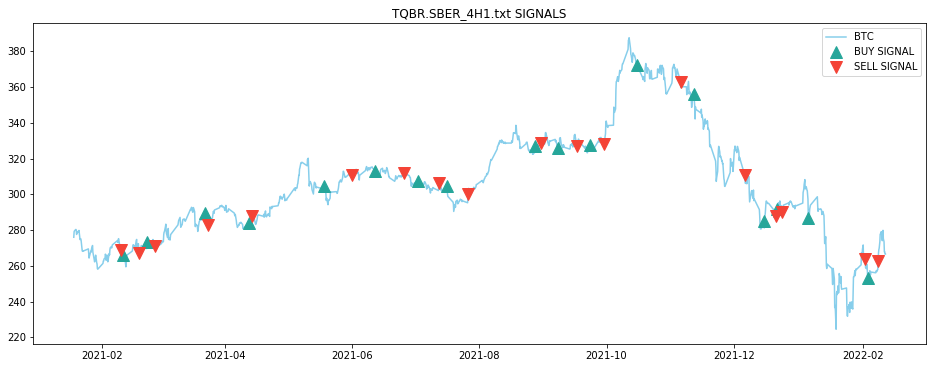

In [29]:
#4 индикатора
plt.figure(figsize=(16,12))
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 5, colspan = 1)
ax1.plot(df.index, df['close'], label = 'BTC', color = 'skyblue')
ax1.plot(df.index, df['final_buy'], marker = '^', markersize = 12, color = '#26a69a', linewidth = 0, label = 'BUY SIGNAL')
ax1.plot(df.index, df['final_sell'], marker = 'v', markersize = 12, color = '#f44336', linewidth = 0, label = 'SELL SIGNAL')
ax1.legend()
ax1.set_title(prod_name + ' SIGNALS')
plt.show()


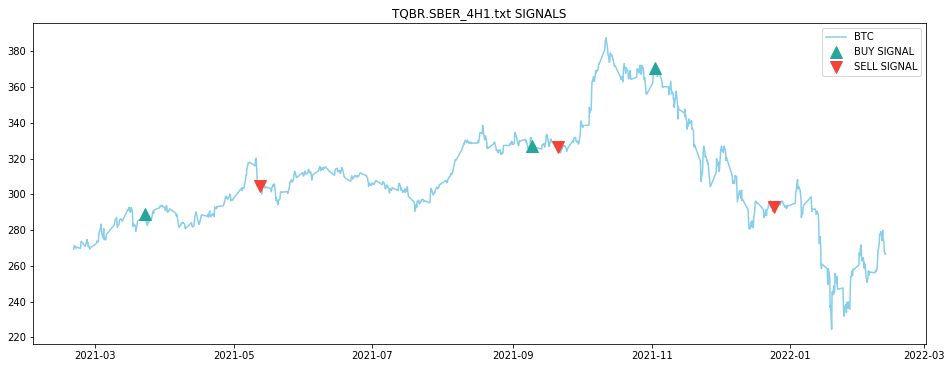

In [93]:
#3 индикатора
plt.figure(figsize=(16,12))
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 5, colspan = 1)
ax1.plot(df.index, df['close'], label = 'BTC', color = 'skyblue')
ax1.plot(df.index, df['final_buy'], marker = '^', markersize = 12, color = '#26a69a', linewidth = 0, label = 'BUY SIGNAL')
ax1.plot(df.index, df['final_sell'], marker = 'v', markersize = 12, color = '#f44336', linewidth = 0, label = 'SELL SIGNAL')
ax1.legend()
ax1.set_title(prod_name + ' SIGNALS')
plt.show()


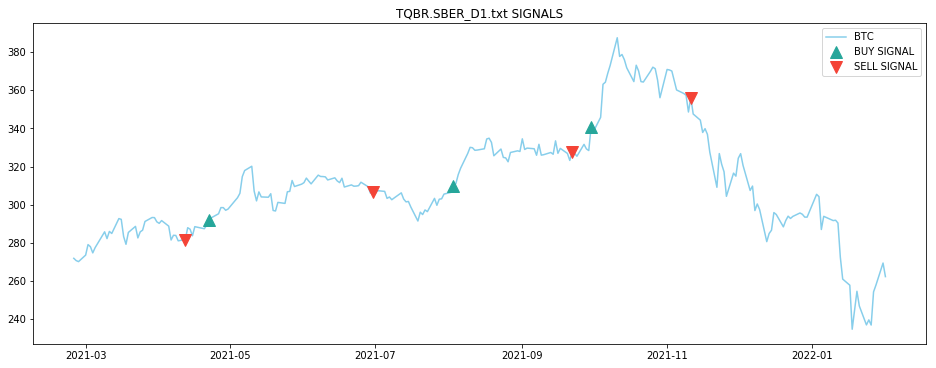

In [120]:
#2 индикатора
plt.figure(figsize=(16,12))
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 5, colspan = 1)
ax1.plot(df.index, df['close'], label = 'BTC', color = 'skyblue')
ax1.plot(df.index, df['final_buy'], marker = '^', markersize = 12, color = '#26a69a', linewidth = 0, label = 'BUY SIGNAL')
ax1.plot(df.index, df['final_sell'], marker = 'v', markersize = 12, color = '#f44336', linewidth = 0, label = 'SELL SIGNAL')
ax1.legend()
ax1.set_title(prod_name + ' SIGNALS')
plt.show()

In [121]:
df['buy_price'] = np.nan
df['sell_price'] = np.nan

for i in range(df.shape[0]):
    
    if df['final_signal'][i] == 1:
        df['buy_price'][i] = df['open'][i]
        
    if df['final_signal'][i] == -1:
        df['sell_price'][i] = df['close'][i]

C:\Users\yaroslav\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\yaroslav\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [33]:
#strategy = pd.concat([strategy, macd_indicator.get_signals('TQBR.GAZP_D1.txt', df.reset_index())], axis=1)

In [122]:
def get_retro(df, prod_name):
    
    btc_ret = pd.DataFrame(np.diff(df['open'])).rename(columns = {0:'returns'})
    strategy_ret = []
    
    for i in range(len(btc_ret)):
        returns = btc_ret['returns'][i]*df['final_position'][i]
        strategy_ret.append(returns)
        
    strategy_ret_df = pd.DataFrame(strategy_ret).rename(columns = {0:'returns'})
    investment_value = 10000
    number_of_stocks = investment_value/df['close'][-1]
    investment_ret = []
    
    for i in range(len(strategy_ret_df['returns'])):
        returns = number_of_stocks*strategy_ret_df['returns'][i]
        investment_ret.append(returns)
    
    investment_ret_df = pd.DataFrame(investment_ret).rename(columns = {0:'investment_returns'})
    total_investment_ret = round(sum(investment_ret_df['investment_returns']), 2)
    profit_percentage = round((total_investment_ret/investment_value)*100, 2)
    print('Profit gained from the AO strategy by investing 10k: {}'.format(total_investment_ret))
    print('Profit percentage of the AO strategy : {}%'.format(profit_percentage))

## Запуск ретро

In [123]:
#сбер
get_retro(df, 'SBER')

Profit gained from the AO strategy by investing 10k: 4859.32
Profit percentage of the AO strategy : 48.59%


In [77]:
get_retro(df)

Profit gained from the AO strategy by investing 10k: 3272.91
Profit percentage of the AO strategy : 32.73%


In [53]:
get_retro(df)

Profit gained from the AO strategy by investing 10k: 3594.58
Profit percentage of the AO strategy : 35.95%


In [94]:
get_retro(df, prod_name)

Profit gained from the AO strategy by investing 10k: 2728.71
Profit percentage of the AO strategy : 27.29%


## Строим график

In [78]:
def signals_plot(df, prod_name):

    plt.figure(figsize=(10,8))
    ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 5, colspan = 1)
    #ax2 = plt.subplot2grid((10,1), (6,0), rowspan = 4, colspan = 1)
    ax1.plot(df['close'], label = 'BTC', color = 'skyblue')
    ax1.plot(df.index, df['buy_price'], marker = '^', markersize = 12, color = '#26a69a', linewidth = 0, label = 'BUY SIGNAL')
    ax1.plot(df.index, df['sell_price'], marker = 'v', markersize = 12, color = '#f44336', linewidth = 0, label = 'SELL SIGNAL')
    ax1.legend()
    ax1.set_title(prod_name + ' SIGNALS')
    #for i in range(1, len(df)):
    #    if df['ao'][i-1] > df['ao'][i]:
    #        ax2.bar(df.index[i], df['ao'][i], color = '#f44336')
    #    else:
    #        ax2.bar(df.index[i], df['ao'][i], color = '#26a69a')
    #ax2.set_title('BITCOIN AWESOME OSCILLATOR 5,34')
    plt.show()

In [68]:
df

,open,high,low,close,volume,ao,ao_signal,ao_position,macd_signal,macd_position,final_position,final_signal,order_price,buy_price,sell_price
datetime,,,,,,,,,,,,,,,
2021-02-20,226.35,227.10,225.00,225.84,605388,5.486912,1,1,0,1,1,NaN,NaN,NaN,NaN
2021-02-22,226.49,227.30,223.04,225.63,3141277,4.121206,0,1,0,1,1,0.0,NaN,NaN,NaN
2021-02-24,224.42,225.64,220.85,222.55,4079248,2.507441,0,1,-1,0,1,0.0,224.42,NaN,NaN
2021-02-25,223.47,225.50,221.22,221.70,4272211,1.507029,0,1,0,0,1,0.0,NaN,NaN,NaN
2021-02-26,220.56,221.68,217.20,217.56,6373510,0.589412,0,1,0,0,1,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-18,329.15,329.30,296.70,301.11,22009613,-3.409265,-1,0,0,0,1,0.0,NaN,NaN,NaN
2022-01-19,300.00,320.42,282.72,318.36,22003631,-9.785588,0,0,0,0,1,0.0,NaN,NaN,NaN
2022-01-20,318.36,326.69,310.07,310.42,13026143,-14.665441,0,0,0,0,1,0.0,NaN,NaN,NaN


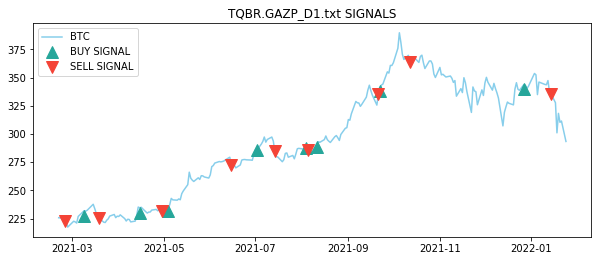

In [57]:
prod_name = 'TQBR.GAZP_D1.txt'

signals_plot(df, prod_name)

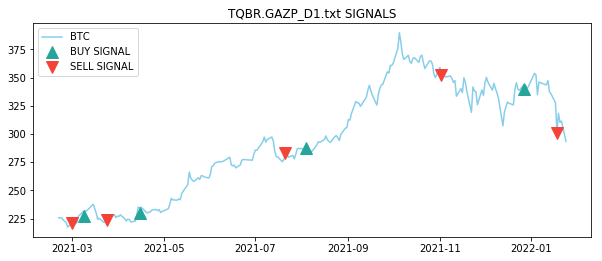

In [79]:
# Закрытие и открытие при И

prod_name = 'TQBR.GAZP_D1.txt'

signals_plot(df, prod_name)

In [ ]:
1

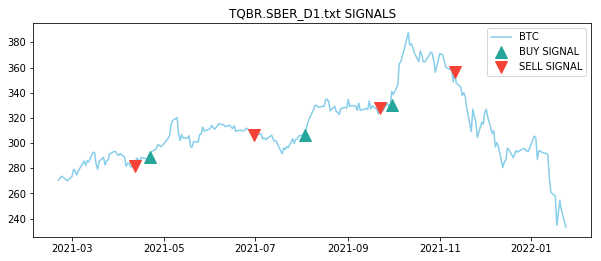

In [95]:
signals_plot(df, prod_name)

In [58]:
df.iloc[130:160]

,open,high,low,close,volume,ao,ao_signal,ao_position,macd_signal,macd_position,final_position,final_signal,order_price,buy_price,sell_price
datetime,,,,,,,,,,,,,,,
2021-08-25,298.71,299.20,294.37,296.70,3090647,7.693000,0,1,0,1,1,0.0,NaN,NaN,NaN
2021-08-26,295.92,295.97,293.04,294.34,2499051,7.880471,0,1,0,1,1,0.0,NaN,NaN,NaN
2021-08-27,295.81,300.00,294.81,299.66,3406306,8.635029,0,1,0,1,1,0.0,NaN,NaN,NaN
2021-08-30,301.66,305.50,299.97,305.17,6984915,9.891882,0,1,0,1,1,0.0,NaN,NaN,NaN
2021-08-31,305.83,307.67,304.10,305.65,6431808,10.858559,0,1,0,1,1,0.0,NaN,NaN,NaN
2021-09-01,306.60,313.95,306.19,312.89,7941057,12.379471,0,1,0,1,1,0.0,NaN,NaN,NaN
2021-09-02,313.59,314.80,310.30,312.30,5334982,14.830794,0,1,0,1,1,0.0,NaN,NaN,NaN
2021-09-03,312.70,317.96,311.16,317.94,6363779,17.350676,0,1,0,1,1,0.0,NaN,NaN,NaN
2021-09-06,319.00,329.35,318.60,328.93,8014135,20.171441,0,1,0,1,1,0.0,NaN,NaN,NaN


In [7]:
prod_name = 'TQBR.GAZP_D1.txt'

df = pd.read_csv('Data/' + prod_name, sep='\t')
    
df.datetime = df.datetime.apply(lambda x: func_1(x))
df.datetime = df.datetime.astype('datetime64')
df = df.loc[lambda x: x.datetime >= pd.to_datetime('2021-01-01')].set_index('datetime')

strategy = awesome_indicator.get_signals('TQBR.GAZP_D1.txt', df)

----------------------------
TQBR.GAZP_D1.txt


UnboundLocalError: local variable 'df' referenced before assignment

In [17]:
strategy.tail(20)

,close,ao,ao_signal,ao_position
datetime,,,,
2021-12-24,338.79,-0.220941,0,0
2021-12-27,343.97,3.002265,1,1
2021-12-28,343.23,5.262794,0,1
2021-12-29,340.33,5.218147,0,1
2021-12-30,342.39,4.929441,0,1
2022-01-03,353.73,6.354676,0,1
2022-01-04,352.55,8.277412,0,1
2022-01-05,335.00,8.300941,0,1
2022-01-06,346.13,8.269853,0,1


----------------------------
TQBR.GAZP_D1.txt


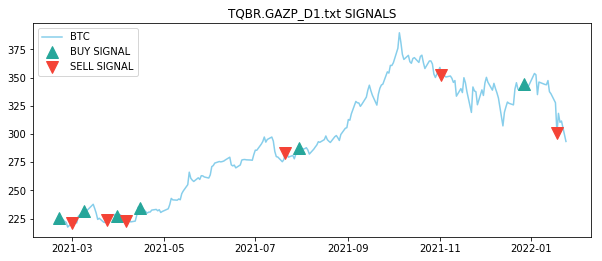

Profit gained from the AO strategy by investing 10k: 1820.63
Profit percentage of the AO strategy : 18.21%
----------------------------
TQBR.NVTK_D1.txt


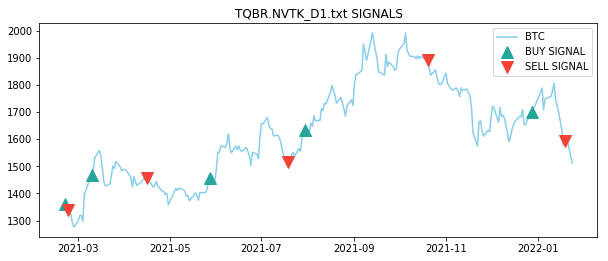

Profit gained from the AO strategy by investing 10k: 1181.06
Profit percentage of the AO strategy : 11.81%
----------------------------
TQBR.OZON_D1.txt


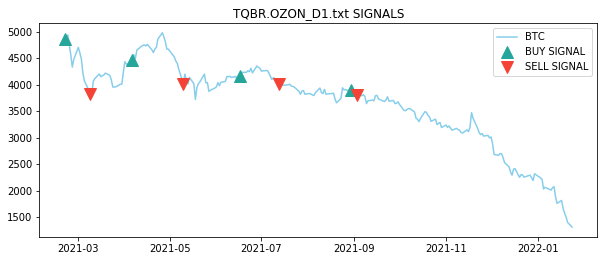

Profit gained from the AO strategy by investing 10k: -13175.57
Profit percentage of the AO strategy : -131.76%
----------------------------
TQBR.POLY_D1.txt


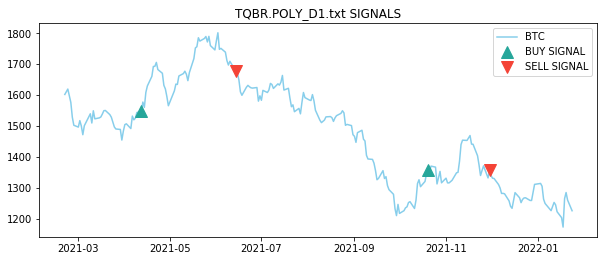

Profit gained from the AO strategy by investing 10k: 610.58
Profit percentage of the AO strategy : 6.11%
----------------------------
TQBR.ROSN_D1.txt


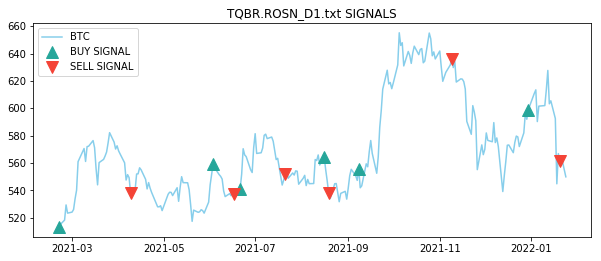

Profit gained from the AO strategy by investing 10k: 540.1
Profit percentage of the AO strategy : 5.4%
----------------------------
TQBR.SBERP_D1.txt


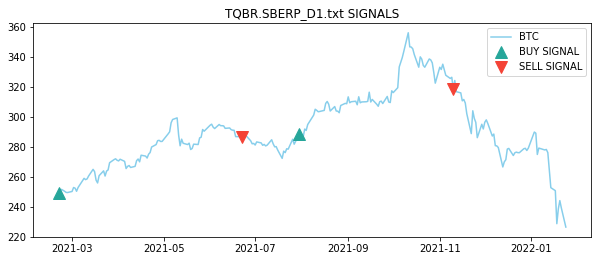

Profit gained from the AO strategy by investing 10k: 2961.47
Profit percentage of the AO strategy : 29.61%
----------------------------
TQBR.SBER_D1.txt


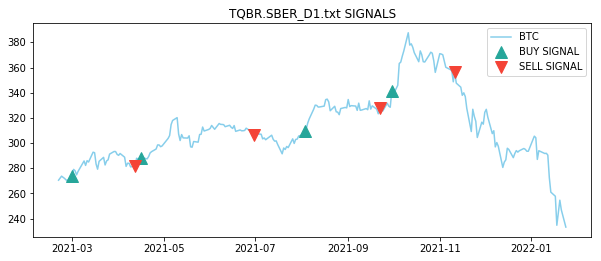

Profit gained from the AO strategy by investing 10k: 2672.98
Profit percentage of the AO strategy : 26.73%
----------------------------
TQBR.SIBN_D1.txt


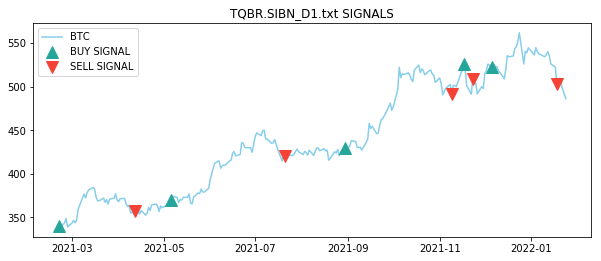

Profit gained from the AO strategy by investing 10k: 1915.92
Profit percentage of the AO strategy : 19.16%
----------------------------
TQBR.TCSG_D1.txt


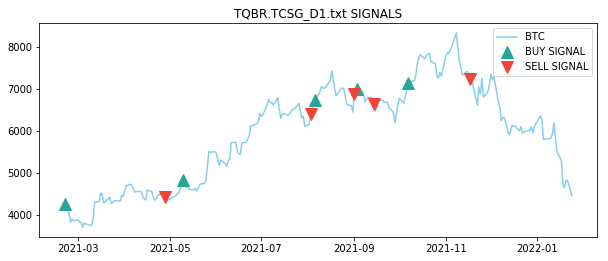

Profit gained from the AO strategy by investing 10k: 3684.09
Profit percentage of the AO strategy : 36.84%
----------------------------
TQBR.YNDX_D1.txt


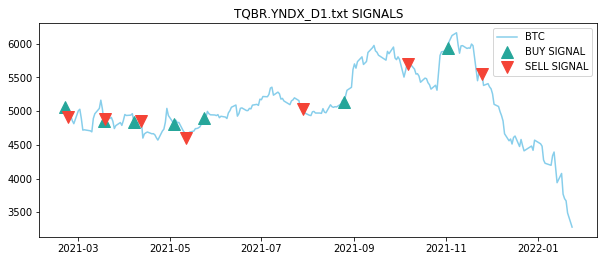

Profit gained from the AO strategy by investing 10k: 40.24
Profit percentage of the AO strategy : 0.4%
----------------------------
TQTD.VTBA_D1.txt


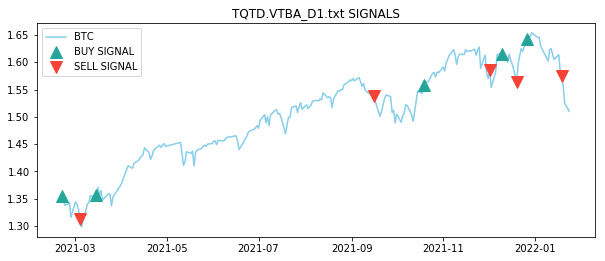

Profit gained from the AO strategy by investing 10k: 304.64
Profit percentage of the AO strategy : 3.05%
----------------------------
TQTF.VTBX_D1.txt


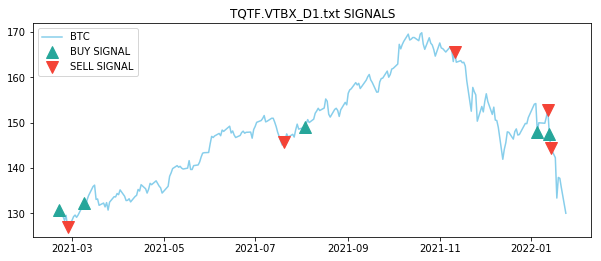

Profit gained from the AO strategy by investing 10k: 2153.02
Profit percentage of the AO strategy : 21.53%


In [10]:
for file_name in os.listdir('./Data'):

    get_backtest(file_name)

In [15]:
os.listdir('./Data')

['TQBR.GAZP_D1.txt',
 'TQBR.NVTK_D1.txt',
 'TQBR.OZON_D1.txt',
 'TQBR.POLY_D1.txt',
 'TQBR.ROSN_D1.txt',
 'TQBR.SBERP_D1.txt',
 'TQBR.SBER_D1.txt',
 'TQBR.SIBN_D1.txt',
 'TQBR.TCSG_D1.txt',
 'TQBR.YNDX_D1.txt',
 'TQTD.VTBA_D1.txt',
 'TQTF.VTBX_D1.txt']

## Котировки

In [33]:
df = pd.read_csv('Data/TQTF.VTBX_D1.txt', sep='\t')

In [34]:
def func_1(x):
    
    return datetime.strptime(x[:10], '%d.%m.%Y')

df.datetime = df.datetime.apply(lambda x: func_1(x))
df.datetime = df.datetime.astype('datetime64')

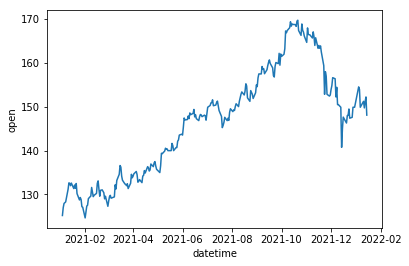

In [35]:
sns.lineplot(data=df.loc[lambda x: x.datetime >= pd.to_datetime('2021-01-01')], x="datetime", y="open")

In [36]:
df = df.loc[lambda x: x.datetime >= pd.to_datetime('2021-01-01')].set_index('datetime')
df.head()

,open,high,low,close,volume
datetime,,,,,
2021-01-04,125.20,127.5,125.20,127.20,157303
2021-01-05,127.00,128.0,125.40,127.80,149617
2021-01-06,127.95,128.5,127.05,128.05,132239
2021-01-08,128.30,132.0,128.05,131.50,190439
2021-01-11,131.20,133.6,130.40,132.65,478206


## Индикаторы

In [37]:
def sma(price, period):
    sma = price.rolling(period).mean()
    return sma

def ao(price, period1, period2):
    median = price.rolling(2).median()
    short = sma(median, period1)
    long = sma(median, period2)
    ao = short - long
    ao_df = pd.DataFrame(ao).rename(columns = {'Close':'ao'})
    return ao_df

df['ao'] = ao(df['close'], 5, 34)
df = df.dropna()
df.tail()

,open,high,low,close,volume,ao
datetime,,,,,,
2022-01-10,151.25,151.55,148.05,149.90,532551,0.581324
2022-01-11,149.75,151.85,149.00,151.25,429490,0.327941
2022-01-12,151.25,153.25,150.70,152.85,457742,-0.005147
2022-01-13,152.25,152.70,146.25,147.55,930193,0.014412
2022-01-14,148.10,148.60,140.05,144.40,1318864,-0.286029


## TRADING STRATEGY

In [38]:
def implement_ao_crossover(price, ao):
    buy_price = []
    sell_price = []
    ao_signal = []
    signal = 0
    
    for i in range(len(ao)):
        if ao[i] > 0 and ao[i-1] < 0:
            if signal != 1:
                buy_price.append(price[i])
                sell_price.append(np.nan)
                signal = 1
                ao_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                ao_signal.append(0)
        elif ao[i] < 0 and ao[i-1] > 0:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(price[i])
                signal = -1
                ao_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                ao_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            ao_signal.append(0)
    return buy_price, sell_price, ao_signal

buy_price, sell_price, ao_signal = implement_ao_crossover(df['close'], df['ao'])

TypeError: unsupported operand type(s) for -: 'Timestamp' and 'float'

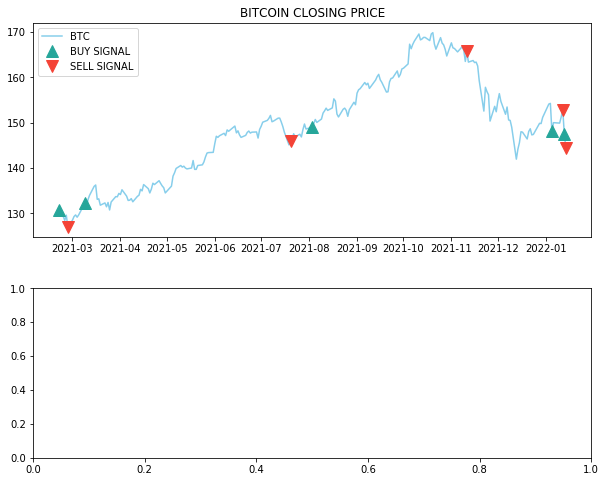

In [39]:
# TRADING SIGNALS PLOT
plt.figure(figsize=(10,8))
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((10,1), (6,0), rowspan = 4, colspan = 1)
ax1.plot(df['close'], label = 'BTC', color = 'skyblue')
ax1.plot(df.index, buy_price, marker = '^', markersize = 12, color = '#26a69a', linewidth = 0, label = 'BUY SIGNAL')
ax1.plot(df.index, sell_price, marker = 'v', markersize = 12, color = '#f44336', linewidth = 0, label = 'SELL SIGNAL')
ax1.legend()
ax1.set_title('BITCOIN CLOSING PRICE')
for i in range(1, len(df)):
    if df['ao'][i-1] > df['ao'][i]:
        ax2.bar(df.index[i], df['ao'][i], color = '#f44336')
    else:
        ax2.bar(df.index[i], df['ao'][i], color = '#26a69a')
ax2.set_title('BITCOIN AWESOME OSCILLATOR 5,34')
plt.show()

In [40]:
df.index[i]

Timestamp('2021-02-22 00:00:00')

## POSITION

In [41]:
position = []
for i in range(len(ao_signal)):
    if ao_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(df['close'])):
    if ao_signal[i] == 1:
        position[i] = 1
    elif ao_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
ao = df['ao']
close_price = df['close']
ao_signal = pd.DataFrame(ao_signal).rename(columns = {0:'ao_signal'}).set_index(df.index)
position = pd.DataFrame(position).rename(columns = {0:'ao_position'}).set_index(df.index)

frames = [close_price, ao, ao_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)

In [42]:
strategy.loc[lambda x: abs(x.ao_signal)==1]

,close,ao,ao_signal,ao_position
datetime,,,,
2021-02-20,130.80,1.387353,1,1
2021-02-26,127.00,-0.183971,-1,0
2021-03-09,132.25,0.322794,1,1
2021-07-20,145.85,-0.333676,-1,0
2021-08-03,149.15,0.251324,1,1
2021-11-11,165.70,-0.368088,-1,0
2022-01-05,148.05,0.116176,1,1
2022-01-12,152.85,-0.005147,-1,0
2022-01-13,147.55,0.014412,1,1


## BACKTEST

In [19]:
# BACKTESTING

btc_ret = pd.DataFrame(np.diff(df['close'])).rename(columns = {0:'returns'})
ao_strategy_ret = []

for i in range(len(btc_ret)):
    returns = btc_ret['returns'][i]*strategy['ao_position'][i]
    ao_strategy_ret.append(returns)
    
ao_strategy_ret_df = pd.DataFrame(ao_strategy_ret).rename(columns = {0:'ao_returns'})
investment_value = 10000
number_of_stocks = investment_value/df['close'][-1]
ao_investment_ret = []

for i in range(len(ao_strategy_ret_df['ao_returns'])):
    returns = number_of_stocks*ao_strategy_ret_df['ao_returns'][i]
    ao_investment_ret.append(returns)

ao_investment_ret_df = pd.DataFrame(ao_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(ao_investment_ret_df['investment_returns']), 2)
profit_percentage = round((total_investment_ret/investment_value)*100, 2)
print('Profit gained from the AO strategy by investing 10k in SBER : {}'.format(total_investment_ret))
print('Profit percentage of the AO strategy : {}%'.format(profit_percentage))

Profit gained from the AO strategy by investing 10k in SBER : 2388.89
Profit percentage of the AO strategy : 23.89%


In [31]:
# BACKTESTING GAZP

btc_ret = pd.DataFrame(np.diff(df['close'])).rename(columns = {0:'returns'})
ao_strategy_ret = []

for i in range(len(btc_ret)):
    returns = btc_ret['returns'][i]*strategy['ao_position'][i]
    ao_strategy_ret.append(returns)
    
ao_strategy_ret_df = pd.DataFrame(ao_strategy_ret).rename(columns = {0:'ao_returns'})
investment_value = 10000
number_of_stocks = investment_value/df['close'][-1]
ao_investment_ret = []

for i in range(len(ao_strategy_ret_df['ao_returns'])):
    returns = number_of_stocks*ao_strategy_ret_df['ao_returns'][i]
    ao_investment_ret.append(returns)

ao_investment_ret_df = pd.DataFrame(ao_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(ao_investment_ret_df['investment_returns']), 2)
profit_percentage = round((total_investment_ret/investment_value)*100, 2)
print('Profit gained from the AO strategy by investing 10k in SBER : {}'.format(total_investment_ret))
print('Profit percentage of the AO strategy : {}%'.format(profit_percentage))

Profit gained from the AO strategy by investing 10k in SBER : 2623.3
Profit percentage of the AO strategy : 26.23%


In [43]:
# BACKTESTING GAZP

btc_ret = pd.DataFrame(np.diff(df['close'])).rename(columns = {0:'returns'})
ao_strategy_ret = []

for i in range(len(btc_ret)):
    returns = btc_ret['returns'][i]*strategy['ao_position'][i]
    ao_strategy_ret.append(returns)
    
ao_strategy_ret_df = pd.DataFrame(ao_strategy_ret).rename(columns = {0:'ao_returns'})
investment_value = 10000
number_of_stocks = investment_value/df['close'][-1]
ao_investment_ret = []

for i in range(len(ao_strategy_ret_df['ao_returns'])):
    returns = number_of_stocks*ao_strategy_ret_df['ao_returns'][i]
    ao_investment_ret.append(returns)

ao_investment_ret_df = pd.DataFrame(ao_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(ao_investment_ret_df['investment_returns']), 2)
profit_percentage = round((total_investment_ret/investment_value)*100, 2)
print('Profit gained from the AO strategy by investing 10k in VTBX : {}'.format(total_investment_ret))
print('Profit percentage of the AO strategy : {}%'.format(profit_percentage))

Profit gained from the AO strategy by investing 10k in VTBX : 1939.06
Profit percentage of the AO strategy : 19.39%


In [26]:
# сбер
strategy.kst_signal.value_counts()

 0    252
-1      5
 1      5
Name: kst_signal, dtype: int64

In [25]:
strategy

,close,ao,ao_signal,ao_position
datetime,,,,
2021-02-20,270.51,-2.025088,0,1
2021-02-22,273.71,-1.830265,0,1
2021-02-24,271.90,-1.412206,0,1
2021-02-25,270.71,-0.734912,0,1
2021-02-26,270.17,-0.005647,0,1
...,...,...,...,...
2022-01-03,305.47,-11.678000,0,0
2022-01-04,304.24,-8.596500,0,0
2022-01-05,287.01,-7.266706,0,0
